# ***Used Cars Price Prediction***


**Submitted By:** Marsad Manzoor  
**Roll Number:** *2023R/2022CS203*  
**Department:** Computer Science  
**Session:** 2023  
**Subject:** Artidicial Intelligence \
**Project Type:** Individual

\
**Submitted To:** Mr. Wassem  

---

This project tries to forecast the cost of used automobile by utilizing machine learning models. I have done complete pipeline of any typical ML project including data cleaning, exploratory data analysis (EDA), feature engineering, model training, model evaluation, prediction.

---

# **1. Introduction**

Deciding to purchase a used car can be a tough choice, especially when it comes to determining its accurate market value. This project is intended to develop a machine learning model which can estimate the price of used car from various attributes of used car like brand, model, year of manufacture, fuel type, transmission, km driven and many more. This model allows potential buyers and sellers to make better decisions.

For this project, I used a dataset sourced from [Kaggle](https://www.kaggle.com/datasets/mrmars1010/cars-india-pre-owned) which contains detailed information on thousands of pre-owned cars sold in India.


In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Models and processing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [ ]:
# Setting up some parameters for the workbook

pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (25,5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Loading The Data**

After obtaining the dataset from Kaggle, the first step was to load it using the Pandas library. The dataset contains a wide variety of features describing each car listing. Below is a list of all the features along with a short description of each:

- **brand**: The brand or manufacturer of the car (e.g., Maruti, Hyundai, Honda).
- **model**: The specific model name of the car.
- **reg_year**: The year the car was registered.
- **make_year**: The year the car was manufactured.
- **engine_capacity(CC)**: The engine displacement in cubic centimeters (CC).
- **km_driven**: The total distance the car has been driven.
- **transmission**: The type of transmission system (Manual or Automatic).
- **fuel_type**: The type of fuel the car uses (Petrol, Diesel, etc.).
- **ownership**: The number of times the car has changed ownership.
- **has_insurance**: Whether the car has valid insurance (Yes or No).
- **spare_key**: Whether the car includes a spare key.
- **price**: The selling price of the car (Target Variable).
- **overall_cost**: Total estimated cost including price and associated expenses.


The dataset was loaded using `pd.read_csv()` and basic checks were performed using `.info()`, `.describe()`, and `.head()` to understand the structure and contents of the data.


In [ ]:
# The path of folder for the project

folder_path = '/content/drive/MyDrive/CarSales/'

In [ ]:
cars = pd.read_csv(folder_path + 'preowned_cars.csv')
cars.head()

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL


In [ ]:
cars[['title']].to_csv(folder_path + 'car_title.csv', index=False)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   reg_year             720 non-null    object 
 5   fuel_type            2805 non-null   object 
 6   engine_capacity(CC)  2688 non-null   float64
 7   km_driven            2805 non-null   float64
 8   ownership            2805 non-null   object 
 9   price                2806 non-null   int64  
 10  overall_cost         2805 non-null   float64
 11  has_insurance        2805 non-null   object 
 12  spare_key            2805 non-null   object 
 13  reg_number           2805 non-null   object 
 14  title                2805 non-null   object 
dtypes: float64(4), int64(1), object(10)
me

# **3. Data Cleaning**

The dataset had some missing and inconsistent values, which could affect the performance of the model initially. To deal with this, I treated missing values by the right filling techniques and fixed inconsistent categorical values. Unwanted characters or redundant data were also taken out from numerical fields to achieve consistency. In general, the dataset was thoroughly cleaned up in preparation for correct analysis and modeling.


In [ ]:
# check for the missing values

cars.isnull().sum()

,0
brand,1
model,1
transmission,1
make_year,1
reg_year,2086
fuel_type,1
engine_capacity(CC),118
km_driven,1
ownership,1
price,0


## **3.1 Dropping unnecessary columns**

Removed columns that added no value to analysis or prediction, such as unnamed or duplicate index columns.

In [ ]:
cars.drop(columns=['reg_number'], inplace=True)
cars.drop("title", inplace=True, axis=1)

## **3.2 Handling DateTime Features**
Extracted relevant components like the year from registration dates for better feature interpretation.


In [ ]:
# Handling Missing values og make_year

cars['make_year'].fillna(cars['make_year'].median(), inplace=True)
cars['make_year'] = cars['make_year'].astype(int)

In [ ]:
# Making separate column for reg_year_only

cars['reg_year'] = pd.to_datetime(cars['reg_year'], errors='coerce')
cars['reg_year_only'] = cars['reg_year'].dt.year
cars['reg_year_only'].fillna(cars['make_year'].astype(int), inplace=True)

# Deleting reg_year as it is no longer needed
cars.drop(columns=['reg_year'], inplace=True)

In [ ]:
cars.head()

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_year_only
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,2021.0
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,2018.0
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,2022.0
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,2023.0
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,2021.0


## **3.3 Handling Missing Vlaues**
Filled missing data in categorical columns using the most logical default or placeholder values.

In [ ]:
cars['km_driven'].fillna(cars['km_driven'].median(), inplace=True)
cars['overall_cost'].fillna(cars['overall_cost'].median(), inplace=True)
cars['engine_capacity(CC)'].fillna(cars['engine_capacity(CC)'].median(), inplace=True)

In [ ]:
# 4. Filling 'spare_key' with mode

cars['spare_key'].fillna(cars['spare_key'].mode()[0], inplace=True)

In [ ]:
# Deleting Remaining missing values

cars.dropna(inplace=True)

In [ ]:
# check for the missing values again

cars.isnull().sum()

,0
brand,0
model,0
transmission,0
make_year,0
fuel_type,0
engine_capacity(CC),0
km_driven,0
ownership,0
price,0
overall_cost,0


## **3.4 Handling Duplicates**

Checked for and removed duplicate records to ensure data consistency.

In [ ]:
# Removing all the duplicates

cars.drop_duplicates(inplace=True)

## **3.5 Standardize Categorical Values**
Unified inconsistent text formats (e.g., "1st Owner" vs "1st owner") for cleaner encoding.

In [ ]:
cars['brand'] = cars['brand'].str.strip().str.title()
cars['fuel_type'] = cars['fuel_type'].str.strip().str.capitalize()
cars['transmission'] = cars['transmission'].str.strip().str.capitalize()
cars['ownership'] = cars['ownership'].str.strip().str.lower()
cars['spare_key'] = cars['spare_key'].str.strip().str.capitalize()

In [ ]:
cars.head()

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_year_only
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,2021.0
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,2018.0
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,2022.0
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,2023.0
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,2021.0


## **3.6 Handling Outliers**

Outlier detection was performed but no significant outliers were found that required removal.

In [ ]:
cars.describe()

,make_year,engine_capacity(CC),km_driven,price,overall_cost,reg_year_only
count,2804.000000,2804.000000,2804.000000,2.804000e+03,2804.000000,2804.000000
mean,2018.180813,1256.501070,49220.971113,6.715674e+05,13496.468260,2018.205777
std,2.945778,249.470746,26630.091946,3.312188e+05,6041.401503,2.952609
min,2010.000000,624.000000,450.000000,1.630000e+05,4039.000000,2010.000000
25%,2016.000000,1197.000000,28539.250000,4.350000e+05,9267.000000,2016.000000
50%,2018.000000,1197.000000,45699.500000,5.940000e+05,12149.000000,2018.000000
75%,2021.000000,1451.000000,68186.250000,8.140000e+05,15764.750000,2021.000000
max,2024.000000,2694.000000,143991.000000,2.487000e+06,47338.000000,2024.000000


# **4. Exploratory Data Analysis (EDA)**


EDA was used to get an idea of the structure, trends and patterns in the data. Univariate analysis was used to ensure the individual features like car prices, engine capacity, and kilometers driven were seen to be distributed properly. Bivariate analysis let us examine how features like price vs make year and price vs engine size are related.

Bar plot, histogram, pie chart, line graph, and scatter plot were used for better visualization. We also compared average prices by the categories like Brands, Fuel & Transmission. These visualizations have facilitated understanding of the patterns and it is simple for identifying insights key. All in all, EDA made possible the selection of relevant features and construction of good models.


## **4.1 Univariate Analysis**

Univariate analysis was employed to explore how the distribution individual features such as price, brand, fuel and transmission. It acted as a way to grasp the frequency, dispersion, and central tendency of each variable. Different plots such as bar plot, histogram, and pie chart were used to depict these distributions.

### **Distribution of Used Car Prices**
This graph shows the spread of prices of used cars, helping us understand the range and frequency of price values.

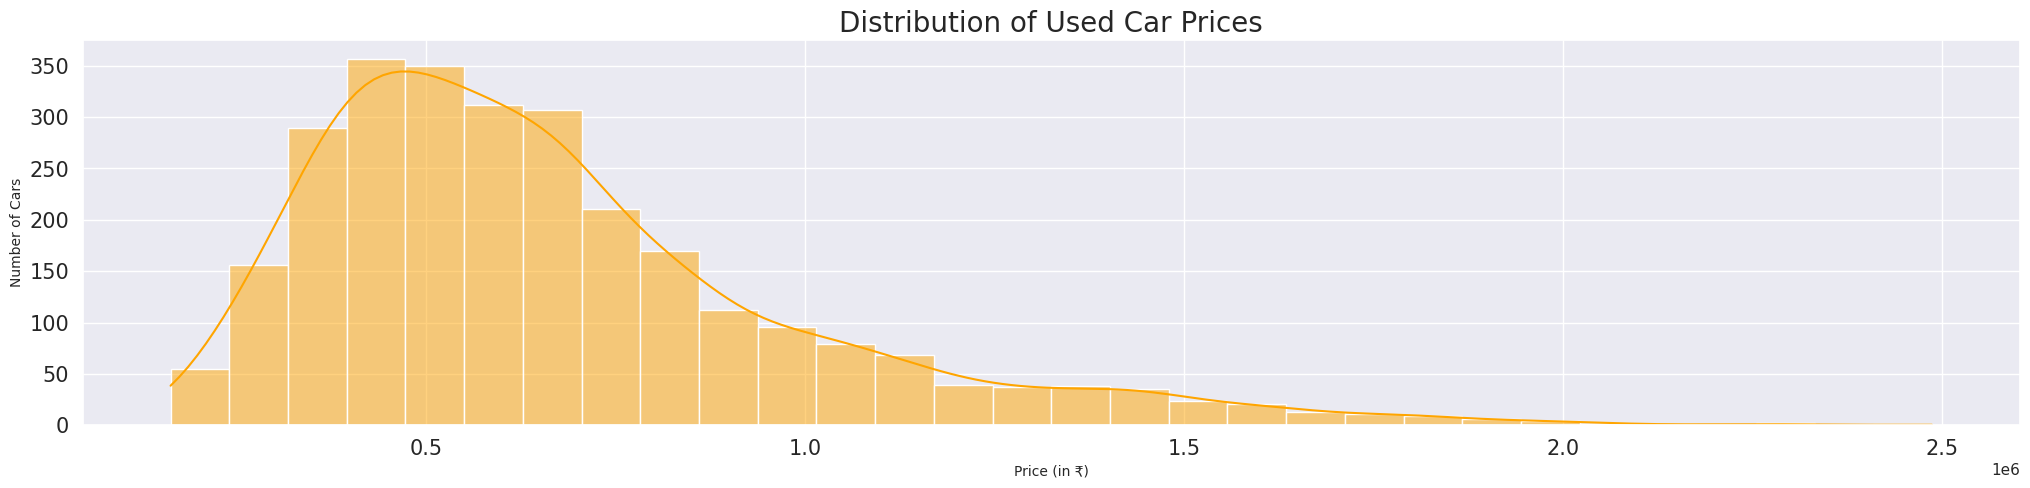

In [ ]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, sharey=True)

sns.histplot(data=cars, x="price", kde=True, bins=30, color="orange", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of Used Car Prices", fontsize=20)
plt.xlabel("Price (in ₹)", fontsize=10)
plt.ylabel("Number of Cars", fontsize=10)

plt.show()

### **Car Count by Brand (Top 10)**
This graph displays the number of used cars available by brand, highlighting the most popular car brands in the dataset.

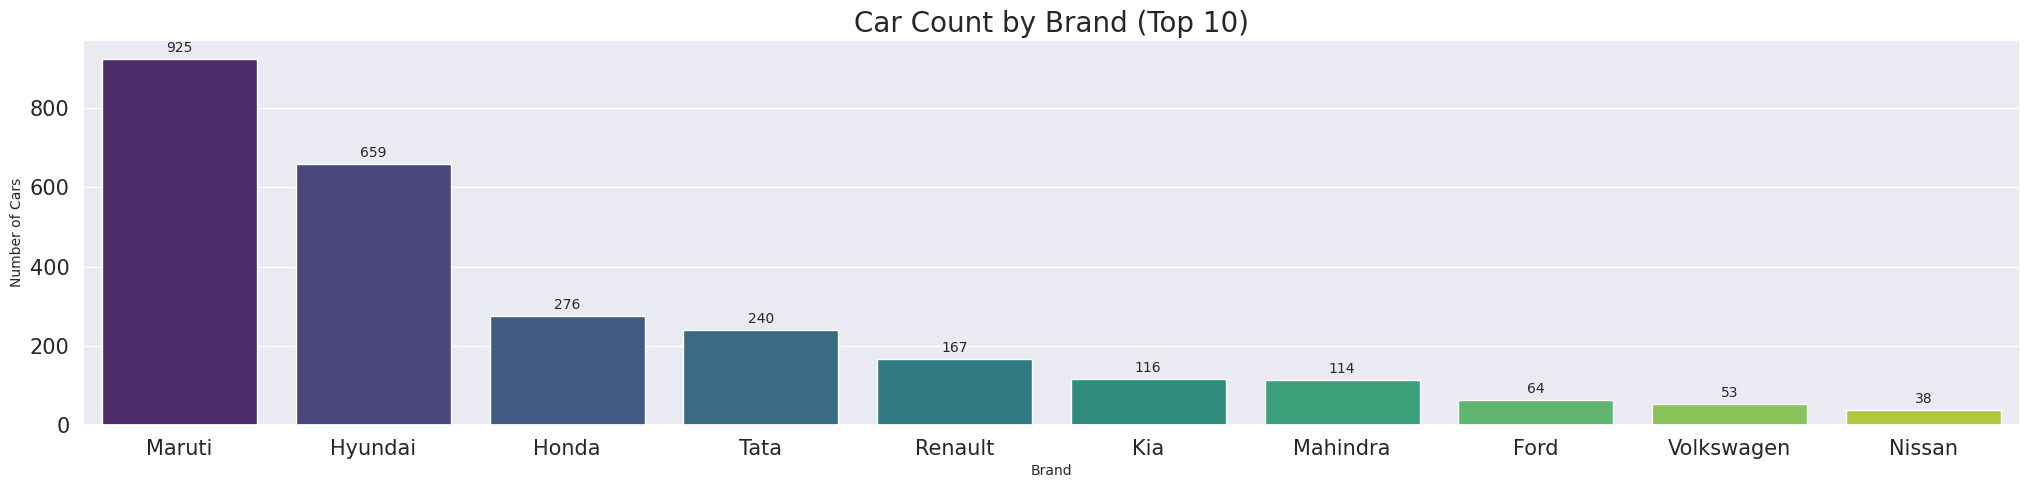

In [ ]:
sns.set(style="darkgrid")

top_brands = cars['brand'].value_counts().nlargest(10).reset_index()
top_brands.columns = ['brand', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=top_brands, x="brand", y="count", palette="viridis", ax=axes)

for i, row in top_brands.iterrows():
    axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Car Count by Brand (Top 10)", fontsize=20)
plt.xlabel("Brand", fontsize=10)
plt.ylabel("Number of Cars", fontsize=10)

plt.show()

### **Kilometers Driven by Ownership Type**
This plot compares the distribution of kilometers driven across different ownership types, showing the spread and density of data points.

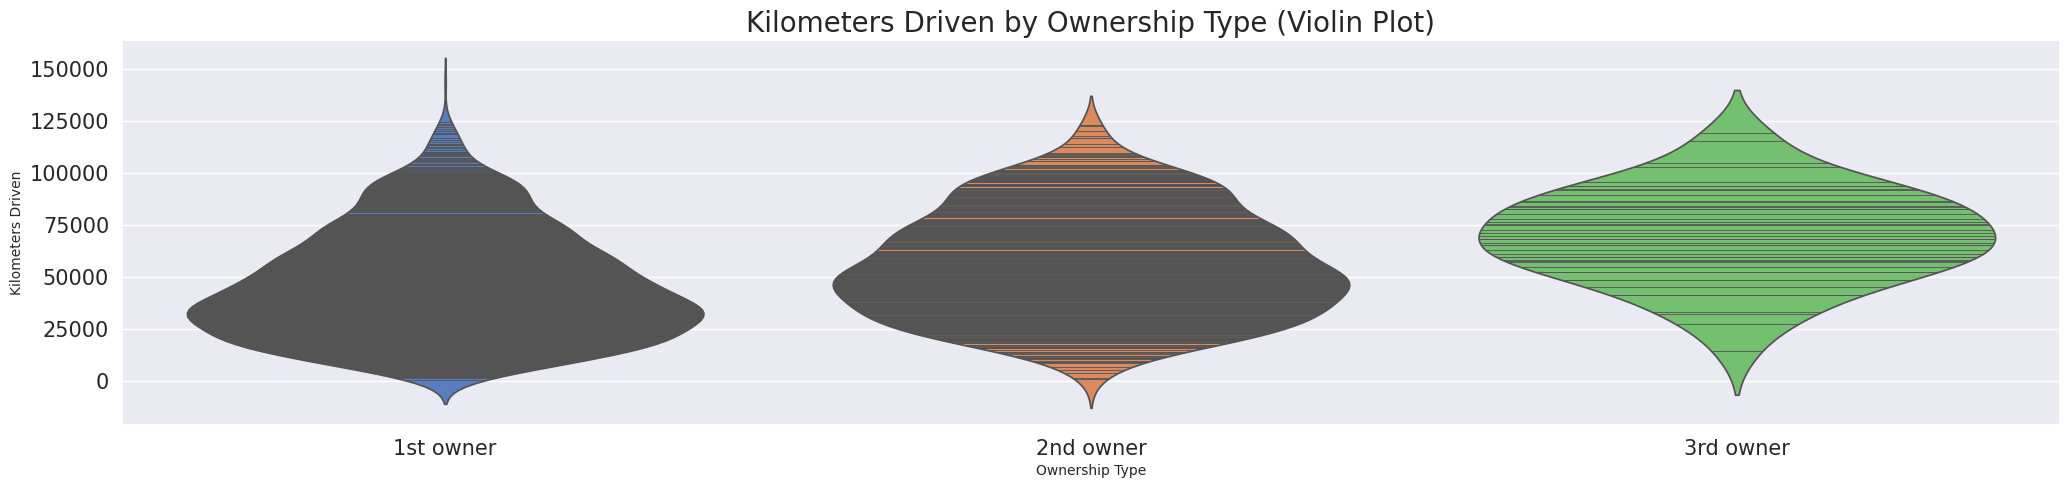

In [ ]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.violinplot(data=cars, x="ownership", y="km_driven", inner="stick", palette="muted", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Kilometers Driven by Ownership Type (Violin Plot)", fontsize=20)
plt.xlabel("Ownership Type", fontsize=10)
plt.ylabel("Kilometers Driven", fontsize=10)

plt.show()

### **Distribution of Kilometers Driven**
This graph illustrates how the kilometers driven by cars are distributed, showing the frequency of cars driven for different distances.

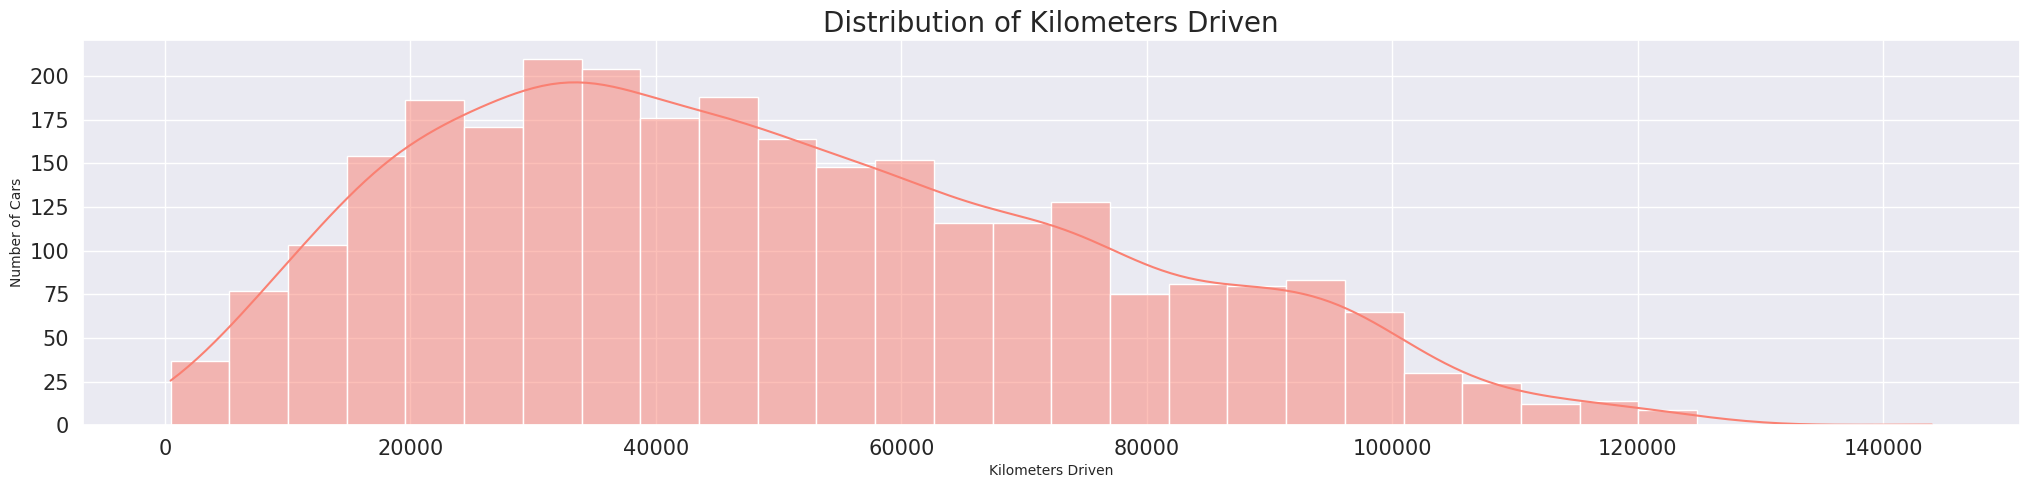

In [ ]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.histplot(data=cars, x="km_driven", kde=True, bins=30, color="salmon", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Distribution of Kilometers Driven", fontsize=20)
plt.xlabel("Kilometers Driven", fontsize=10)
plt.ylabel("Number of Cars", fontsize=10)

plt.show()

### **Transmission Type Distribution**
This graph shows the count of cars based on their transmission type (Manual or Automatic), indicating the popularity of each type.

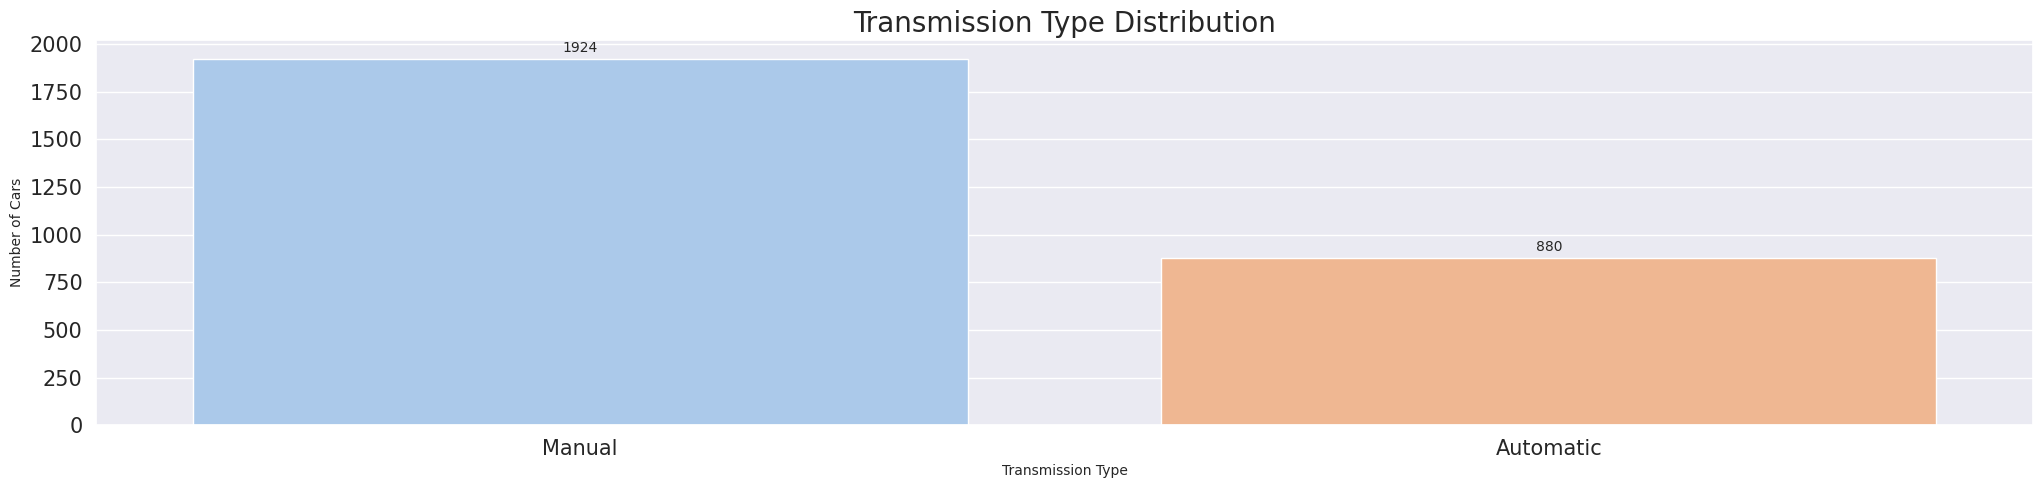

In [ ]:
sns.set(style="darkgrid")

transmission_count = cars['transmission'].value_counts().reset_index()
transmission_count.columns = ['transmission', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=transmission_count, x="transmission", y="count", palette="pastel", ax=axes)

for i, row in transmission_count.iterrows():
    axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Transmission Type Distribution", fontsize=20)
plt.xlabel("Transmission Type", fontsize=10)
plt.ylabel("Number of Cars", fontsize=10)

plt.show()

### **Fuel Type Distribution (Petrol vs Diesel)**
This barplot compares the number of cars based on their fuel type, showing the distribution between petrol and diesel vehicles.


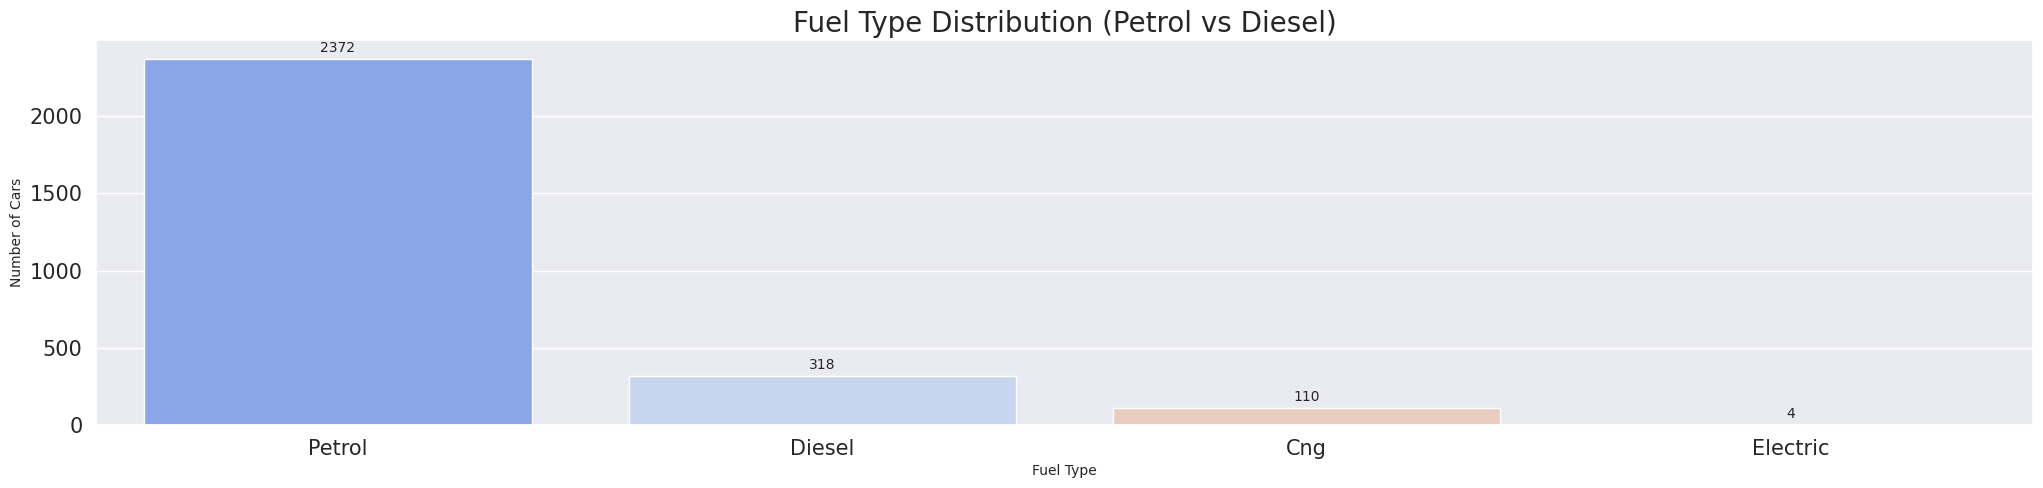

In [ ]:
sns.set(style="darkgrid")

fuel_type_count = cars['fuel_type'].value_counts().reset_index()
fuel_type_count.columns = ['fuel_type', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=fuel_type_count, x="fuel_type", y="count", palette="coolwarm", ax=axes)

for i, row in fuel_type_count.iterrows():
    axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Fuel Type Distribution (Petrol vs Diesel)", fontsize=20)
plt.xlabel("Fuel Type", fontsize=10)
plt.ylabel("Number of Cars", fontsize=10)

plt.show()

### **Price Distribution by Make Year**
This box plot shows how car prices are distributed across different years, highlighting the range, median, and any outliers for each year.

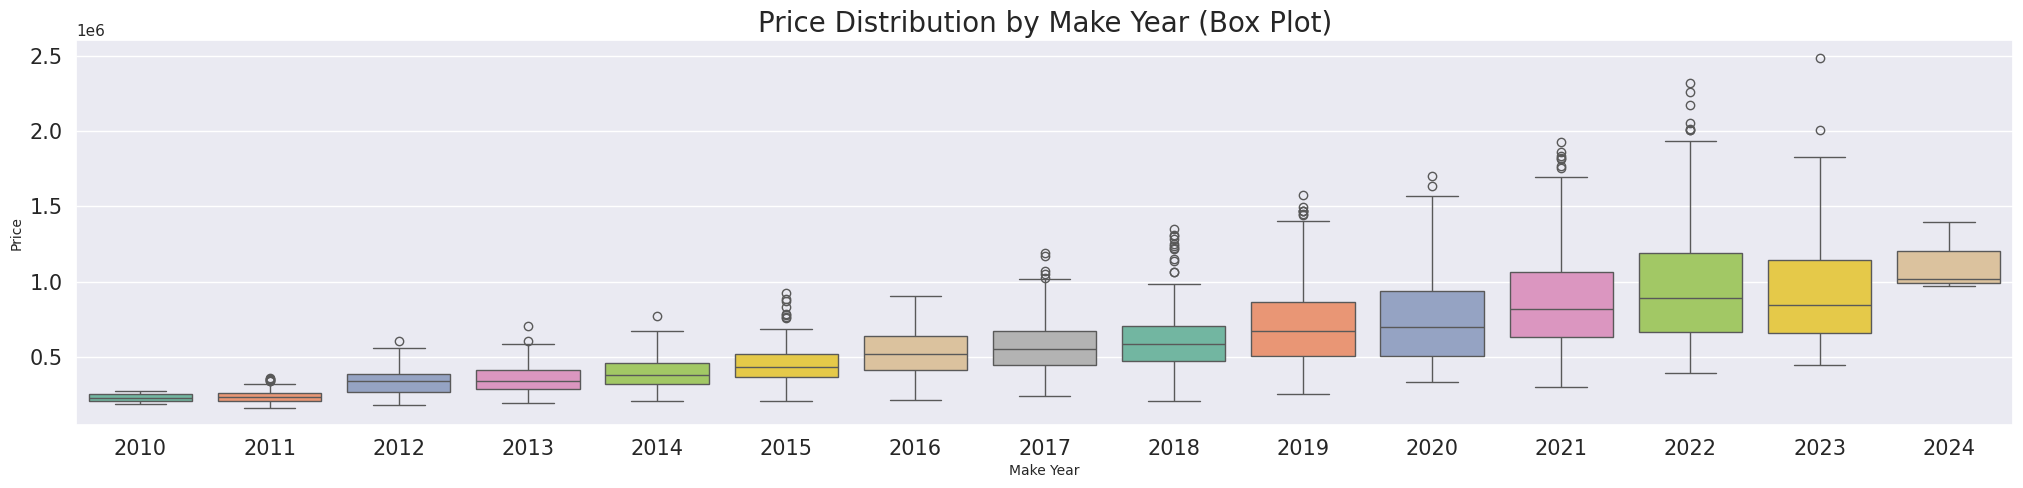

In [ ]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.boxplot(data=cars, x="make_year", y="price", palette="Set2", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Price Distribution by Make Year (Box Plot)", fontsize=20)
plt.xlabel("Make Year", fontsize=10)
plt.ylabel("Price", fontsize=10)

plt.show()

### **Ownership Status Distribution (1st, 2nd, Other)**
This graph shows the distribution of used cars by their ownership status, indicating how many cars belong to the first, second, or other ownership categories.

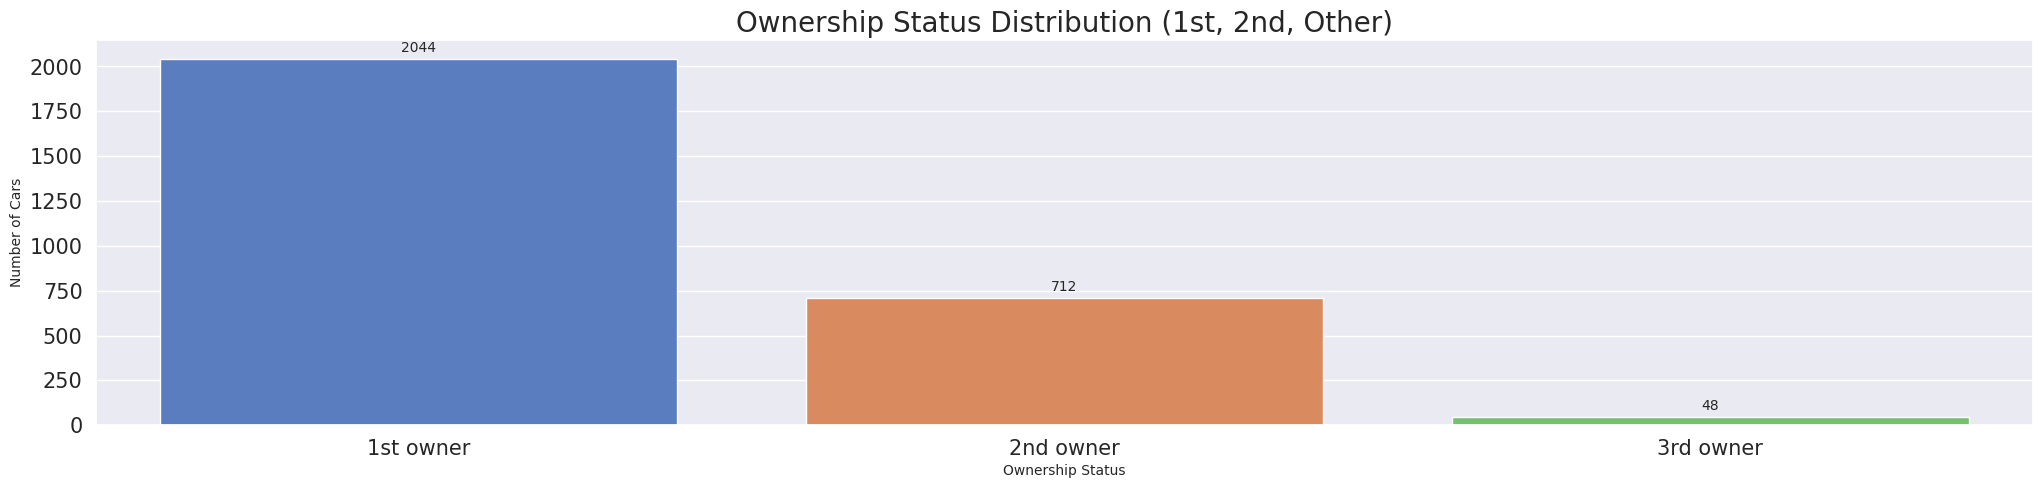

In [ ]:
sns.set(style="darkgrid")

ownership_count = cars['ownership'].value_counts().reset_index()
ownership_count.columns = ['ownership', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=ownership_count, x="ownership", y="count", palette="muted", ax=axes)

for i, row in ownership_count.iterrows():
    axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Ownership Status Distribution (1st, 2nd, Other)", fontsize=20)
plt.xlabel("Ownership Status", fontsize=10)
plt.ylabel("Number of Cars", fontsize=10)

plt.show()

### **Price Distribution**
This plot visualizes the smooth distribution of car prices, giving a clear idea of the price density and major price ranges.

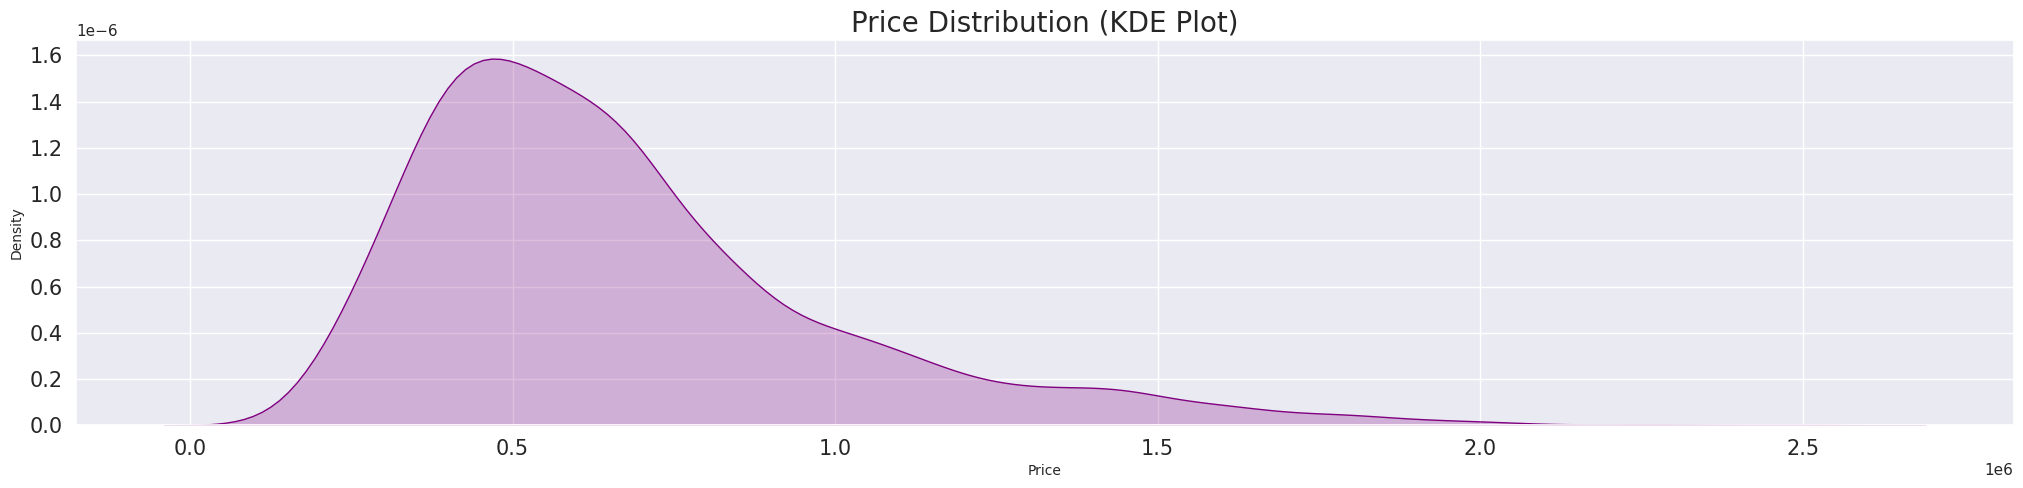

In [ ]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.kdeplot(cars['price'], shade=True, color="purple", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Price Distribution (KDE Plot)", fontsize=20)
plt.xlabel("Price", fontsize=10)
plt.ylabel("Density", fontsize=10)

plt.show()


### **Spare Key Availability (Yes vs No)**
This barplot shows the number of cars with and without a spare key, indicating how many cars come with this feature.

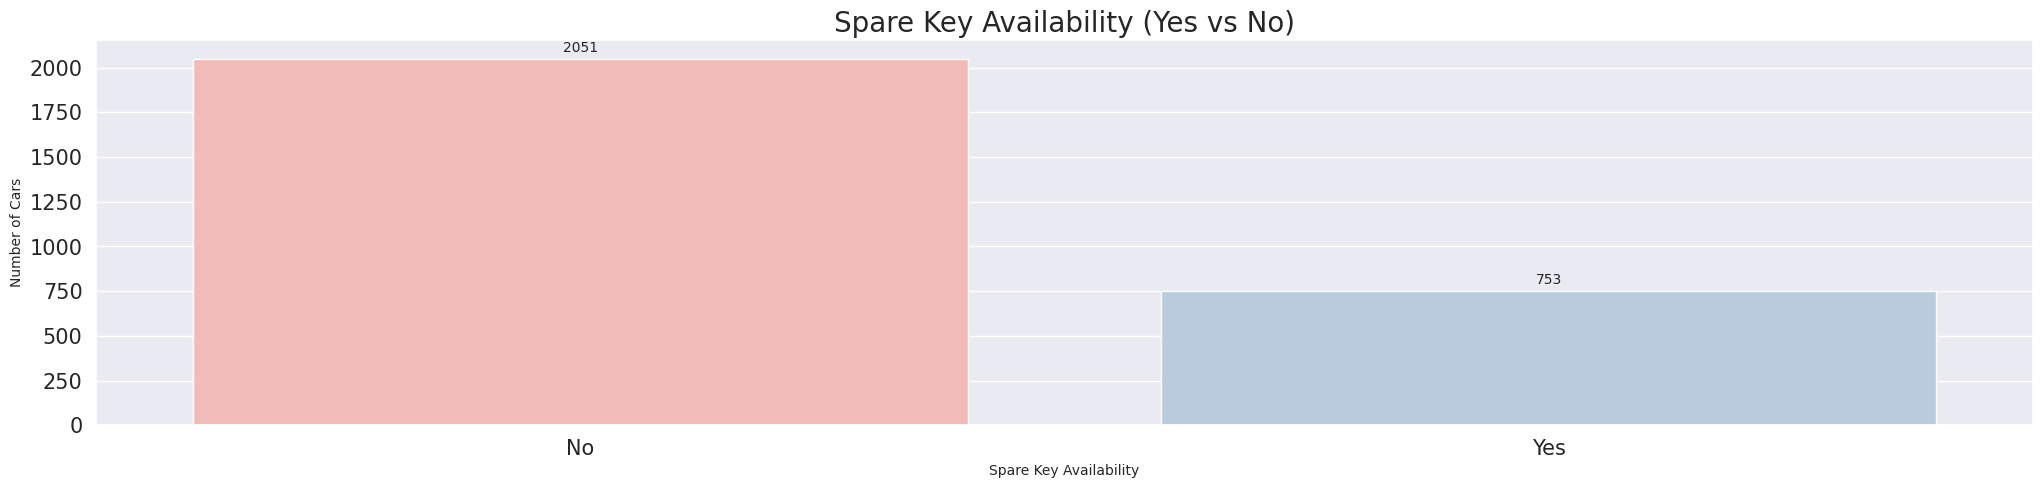

In [ ]:
sns.set(style="darkgrid")

spare_key_count = cars['spare_key'].value_counts().reset_index()
spare_key_count.columns = ['spare_key', 'count']

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=spare_key_count, x="spare_key", y="count", palette="Pastel1", ax=axes)

for i, row in spare_key_count.iterrows():
    axes.annotate(f"{row['count']}", (i, row['count']), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Spare Key Availability (Yes vs No)", fontsize=20)
plt.xlabel("Spare Key Availability", fontsize=10)
plt.ylabel("Number of Cars", fontsize=10)

plt.show()

### **Engine Capacity Distribution**
This graph shows the distribution of engine capacities in used cars, indicating how many cars have smaller or larger engine sizes.

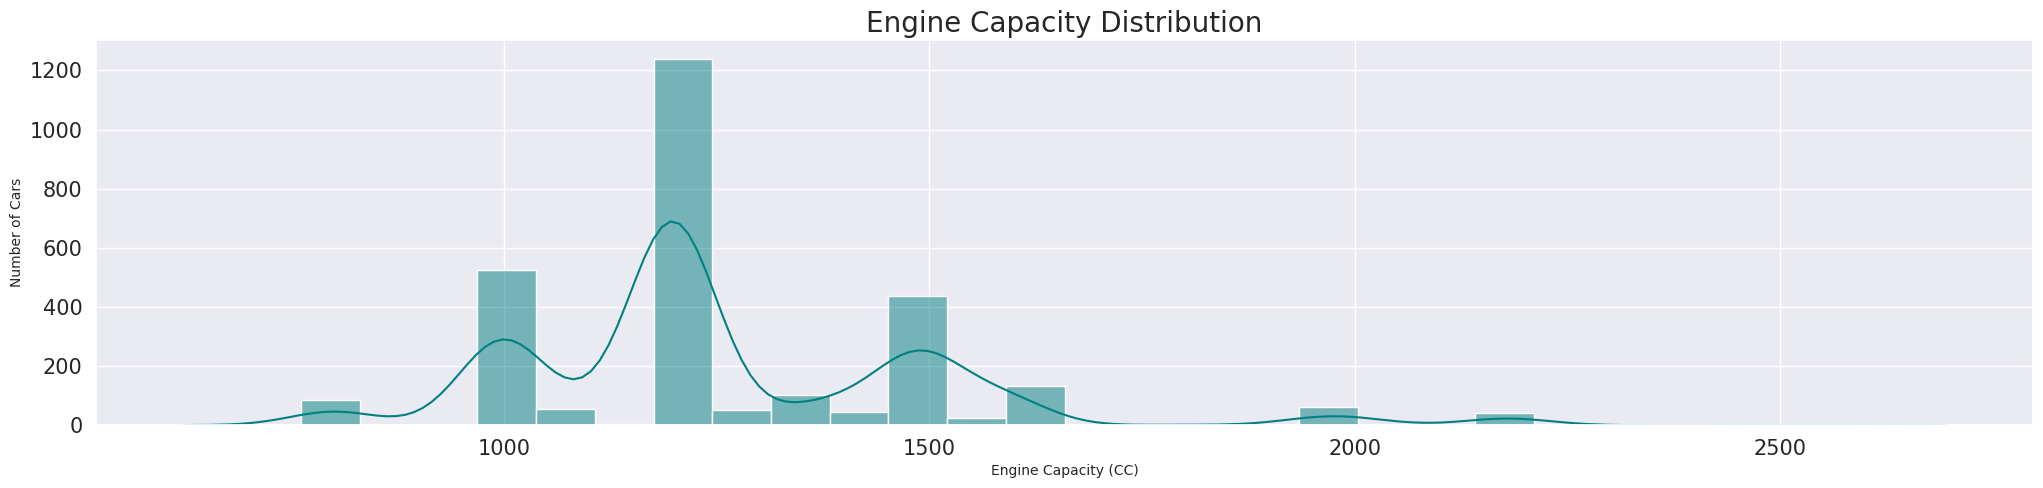

In [ ]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.histplot(data=cars, x="engine_capacity(CC)", kde=True, bins=30, color="teal", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Engine Capacity Distribution", fontsize=20)
plt.xlabel("Engine Capacity (CC)", fontsize=10)
plt.ylabel("Number of Cars", fontsize=10)

plt.show()

### **Make Year Distribution**
This histogram shows the distribution of cars based on their manufacturing year, helping us understand the age of the cars in the dataset.

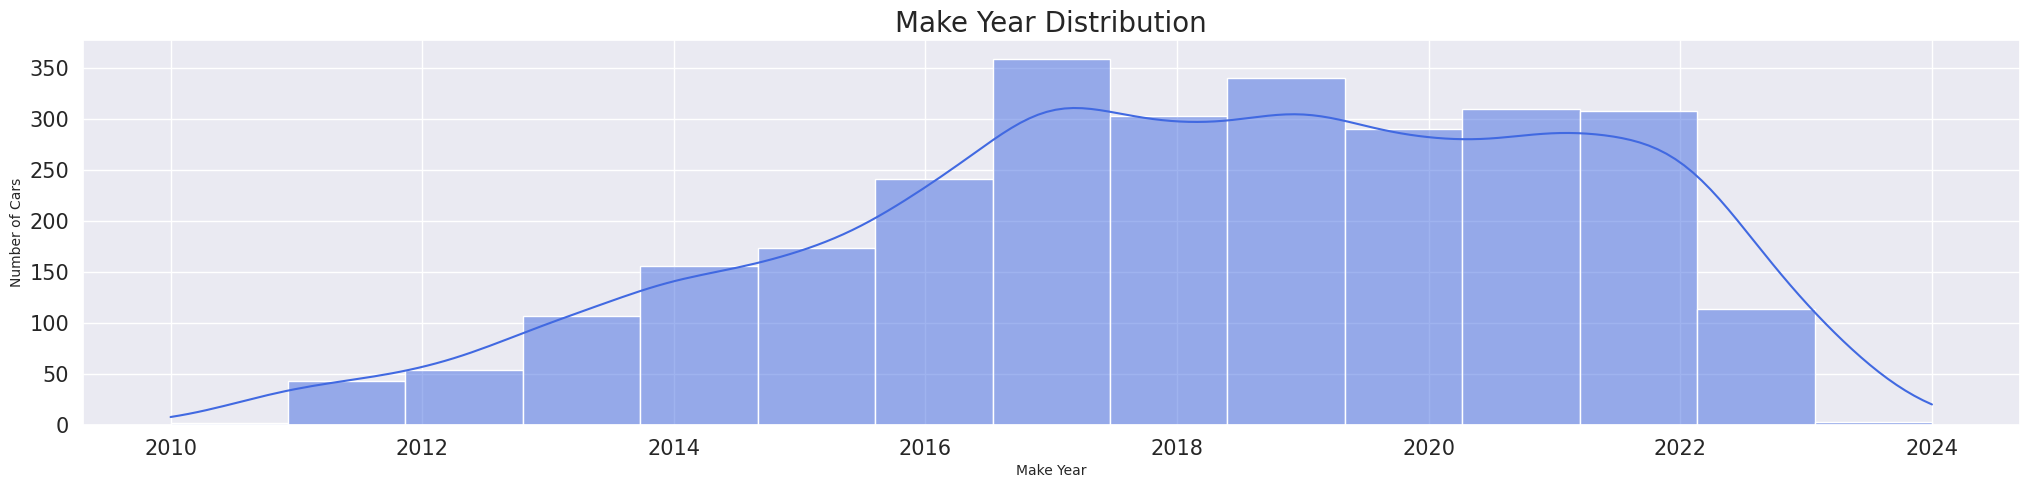

In [ ]:

sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.histplot(data=cars, x="make_year", kde=True, bins=15, color="royalblue", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Make Year Distribution", fontsize=20)
plt.xlabel("Make Year", fontsize=10)
plt.ylabel("Number of Cars", fontsize=10)

plt.show()


## **4.2 Bivariate Analysis**

Bivariate analysis focused on exploring the relationships between two features. It helped to identify patterns, correlations, and how one feature might affect another. Scatter plots, box plots, and bar plots were used to visualize relationships like price vs. kilometers driven, price vs. engine capacity, and average price by fuel type, providing deeper insights into the data.


### **Average Price per Brand (Top 10)**
This barplot shows the average price of cars for the top 10 brands, giving insights into which brands have higher or lower average prices.

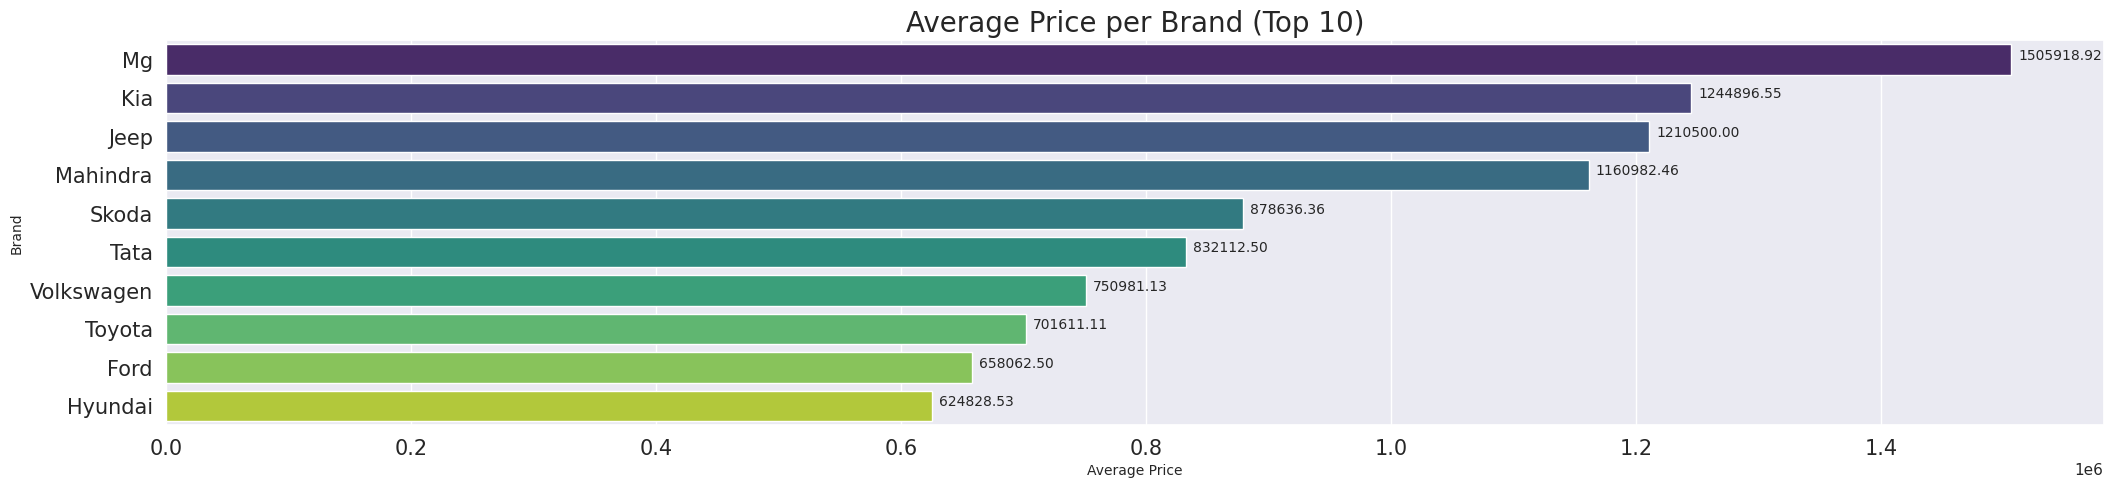

In [ ]:
sns.set(style="darkgrid")

# Calculate the average price per brand and sort it
average_price_per_brand = cars.groupby('brand')['price'].mean().sort_values(ascending=False).head(10).reset_index()

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=average_price_per_brand, x="price", y="brand", palette="viridis", ax=axes)

for i, row in average_price_per_brand.iterrows():
    axes.annotate(f"{row['price']:.2f}", (row['price'], i), textcoords="offset points", xytext=(5, 0), ha='left', fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Average Price per Brand (Top 10)", fontsize=20)
plt.xlabel("Average Price", fontsize=10)
plt.ylabel("Brand", fontsize=10)

plt.show()

### **Average Price by Fuel Type**
This graph shows the average price of cars based on their fuel type (Petrol or Diesel), helping us compare the price differences between the two fuel types.

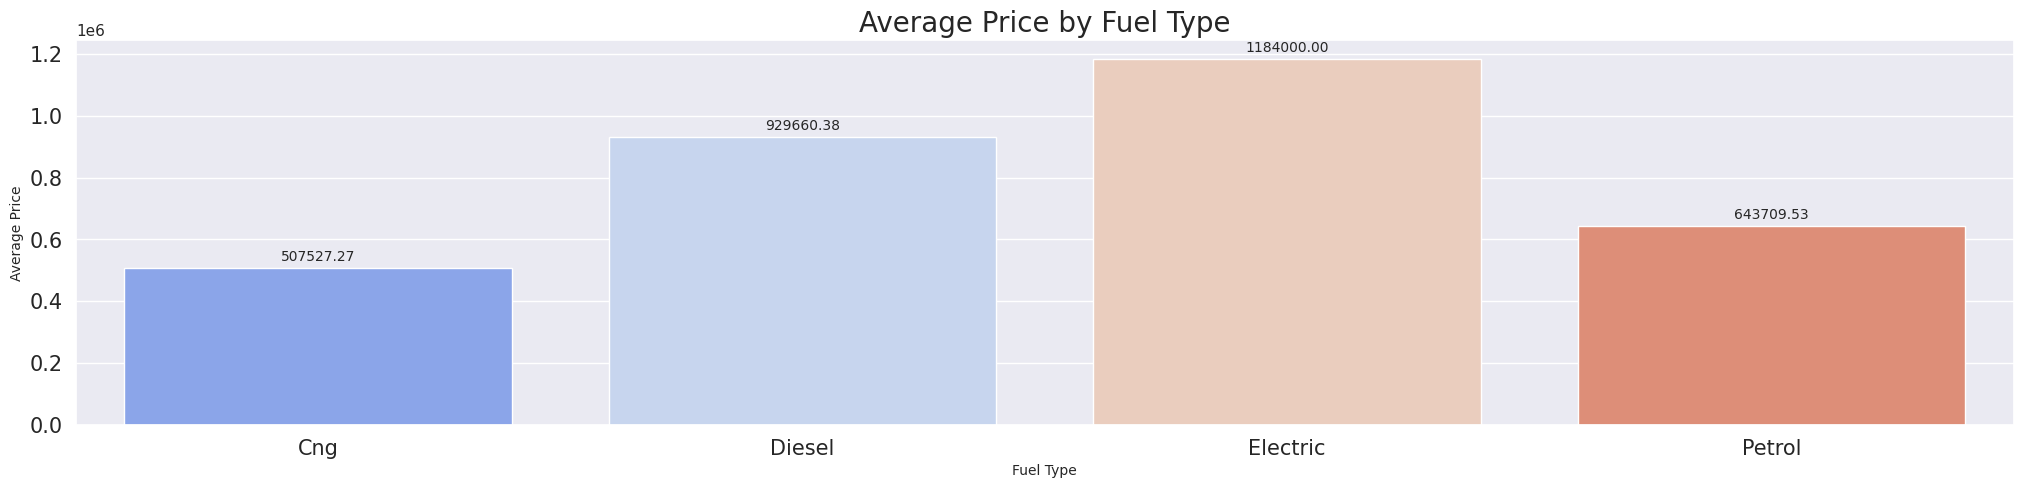

In [ ]:
sns.set(style="darkgrid")

average_price_by_fuel = cars.groupby('fuel_type')['price'].mean().reset_index()

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=average_price_by_fuel, x="fuel_type", y="price", palette="coolwarm", ax=axes)

for i, row in average_price_by_fuel.iterrows():
    axes.annotate(f"{row['price']:.2f}", (i, row['price']), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Average Price by Fuel Type", fontsize=20)
plt.xlabel("Fuel Type", fontsize=10)
plt.ylabel("Average Price", fontsize=10)

plt.show()

### **Average Price by Transmission Type**
This barplot compares the average prices of cars based on their transmission type (Manual vs Automatic), showing how each transmission type affects the price.

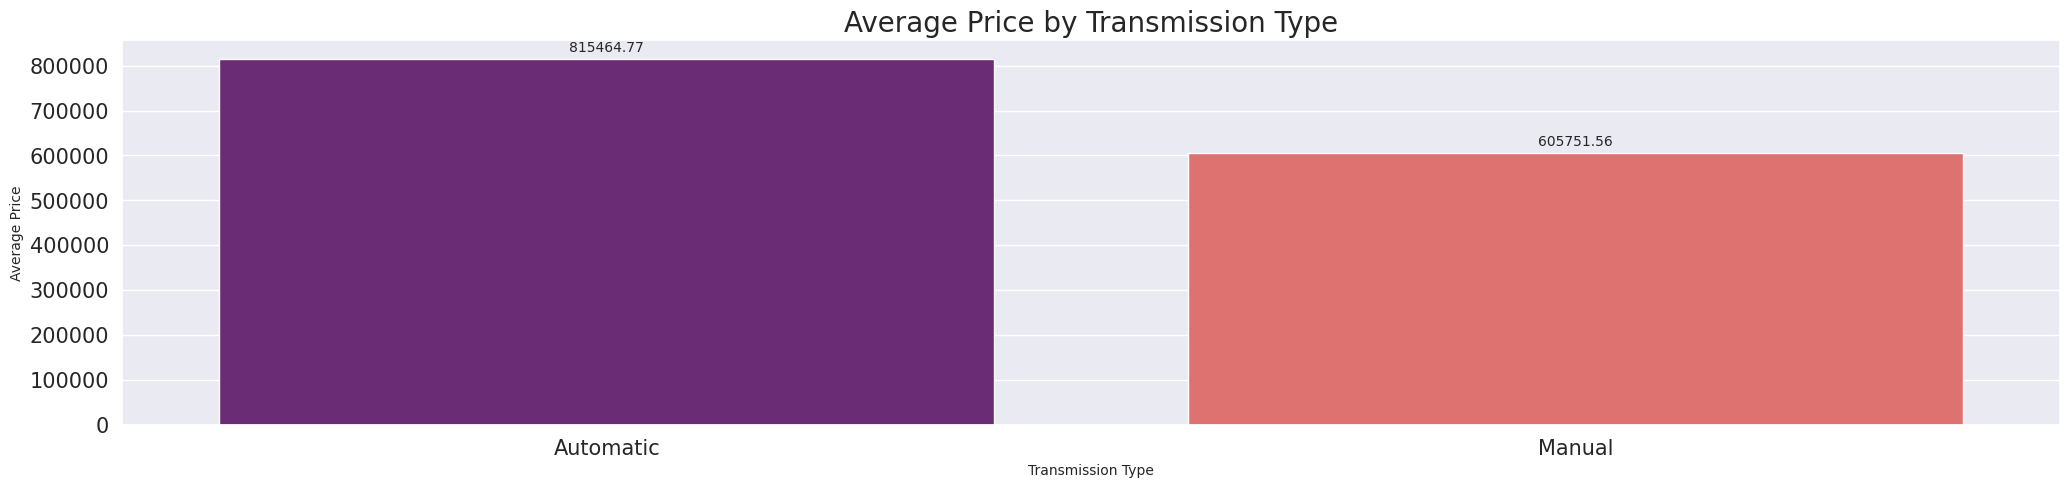

In [ ]:
sns.set(style="darkgrid")

average_price_by_transmission = cars.groupby('transmission')['price'].mean().reset_index()

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=average_price_by_transmission, x="transmission", y="price", palette="magma", ax=axes)

for i, row in average_price_by_transmission.iterrows():
    axes.annotate(f"{row['price']:.2f}", (i, row['price']), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Average Price by Transmission Type", fontsize=20)
plt.xlabel("Transmission Type", fontsize=10)
plt.ylabel("Average Price", fontsize=10)

plt.show()

### **Price vs Kilometers Driven (Scatter Plot)**
This scatter plot shows the relationship between car prices and the number of kilometers driven, helping us understand if there's any pattern between these two variables.

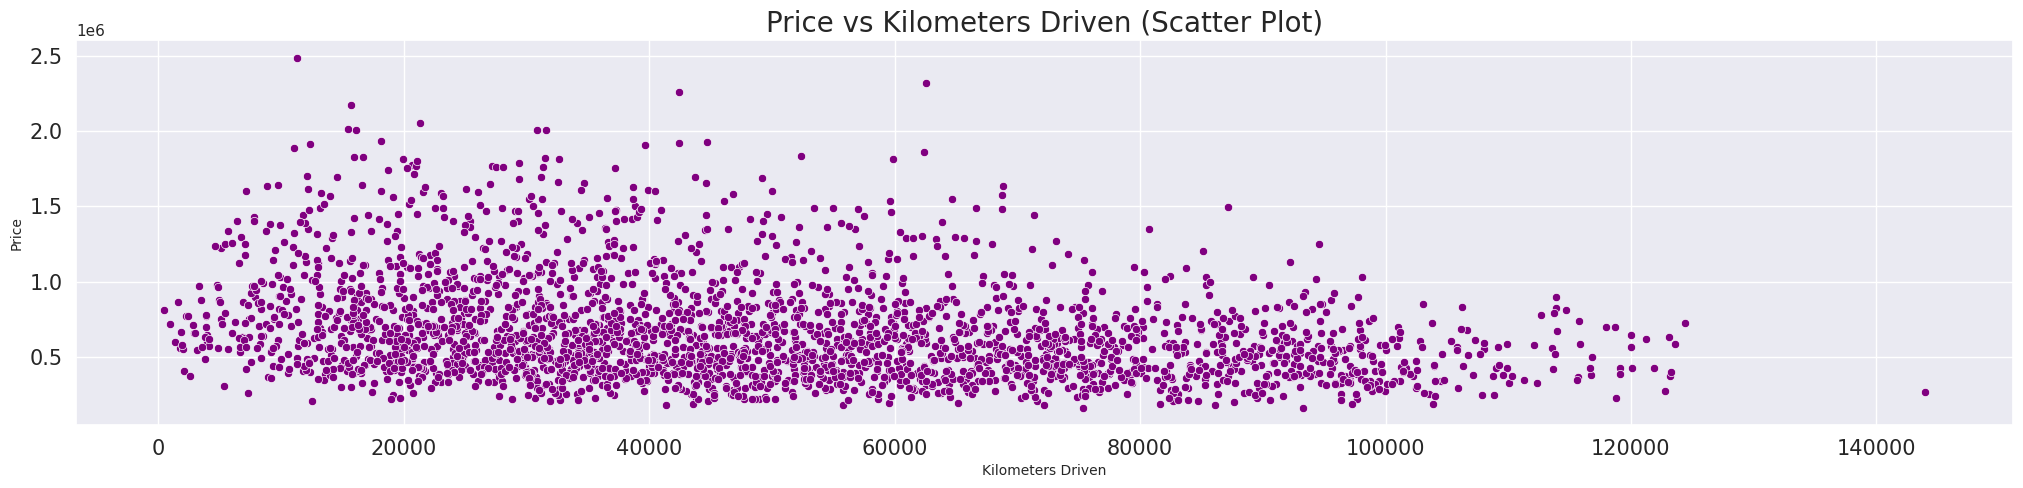

In [ ]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.scatterplot(data=cars, x="km_driven", y="price", color="purple", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Price vs Kilometers Driven (Scatter Plot)", fontsize=20)
plt.xlabel("Kilometers Driven", fontsize=10)
plt.ylabel("Price", fontsize=10)

plt.show()

### **Price vs Engine Capacity (Scatter Plot)**
This scatter plot illustrates the relationship between car prices and engine capacity, indicating if larger engine capacities tend to correlate with higher prices.

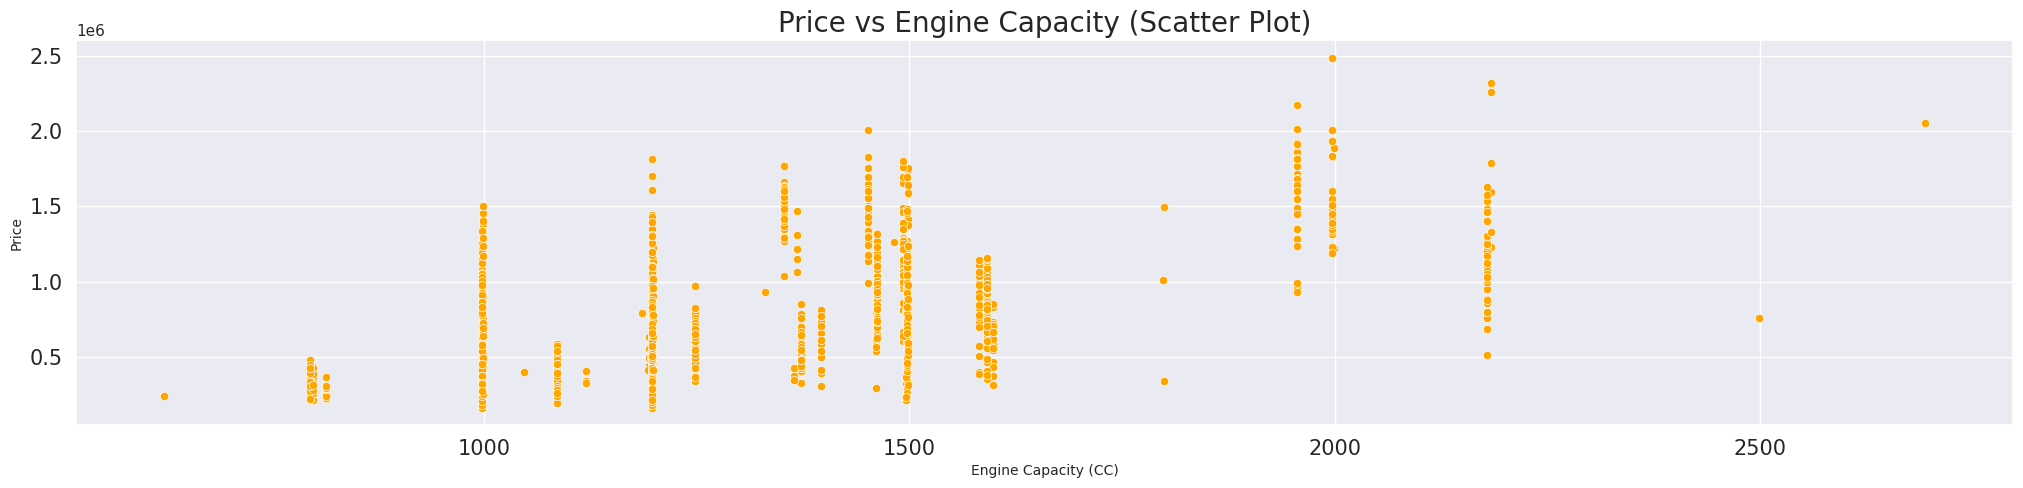

In [ ]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 1, sharey=True)

sns.scatterplot(data=cars, x="engine_capacity(CC)", y="price", color="orange", ax=axes)

plt.tick_params(labelsize=15)
plt.title("Price vs Engine Capacity (Scatter Plot)", fontsize=20)
plt.xlabel("Engine Capacity (CC)", fontsize=10)
plt.ylabel("Price", fontsize=10)

plt.show()


### **Price vs Make Year (Trend Plot)**
This lineplot shows the trend of car prices over different make years, helping us see how prices change with the age of the cars.

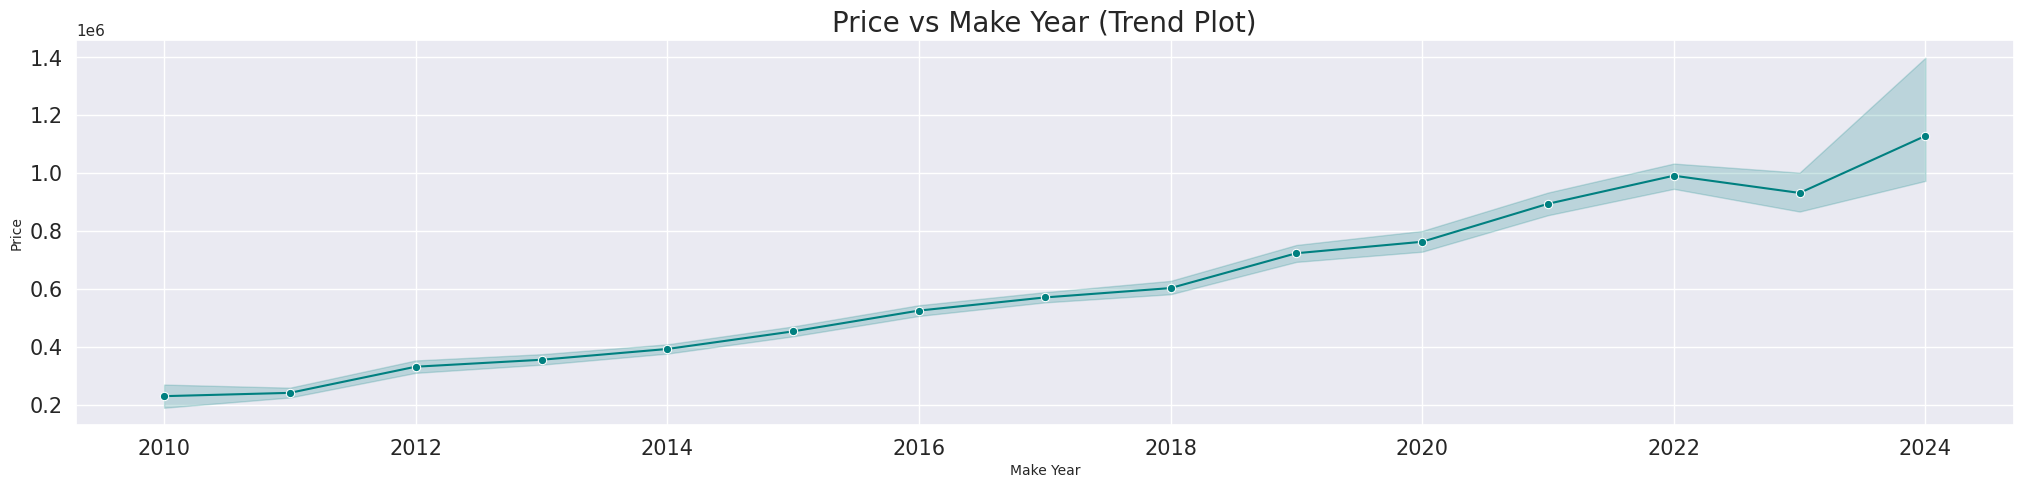

In [ ]:
sns.set(style="darkgrid")

# Plotting the trend of price vs make year
fig, axes = plt.subplots(1, 1, sharey=True)

sns.lineplot(data=cars, x="make_year", y="price", marker="o", color="teal", ax=axes)


plt.tick_params(labelsize=15)
plt.title("Price vs Make Year (Trend Plot)", fontsize=20)
plt.xlabel("Make Year", fontsize=10)
plt.ylabel("Price", fontsize=10)

plt.show()

### **Average Overall Cost by Ownership Type**
This barplot shows the average overall cost of cars based on their ownership type, providing insights into how ownership affects the car's overall cost.

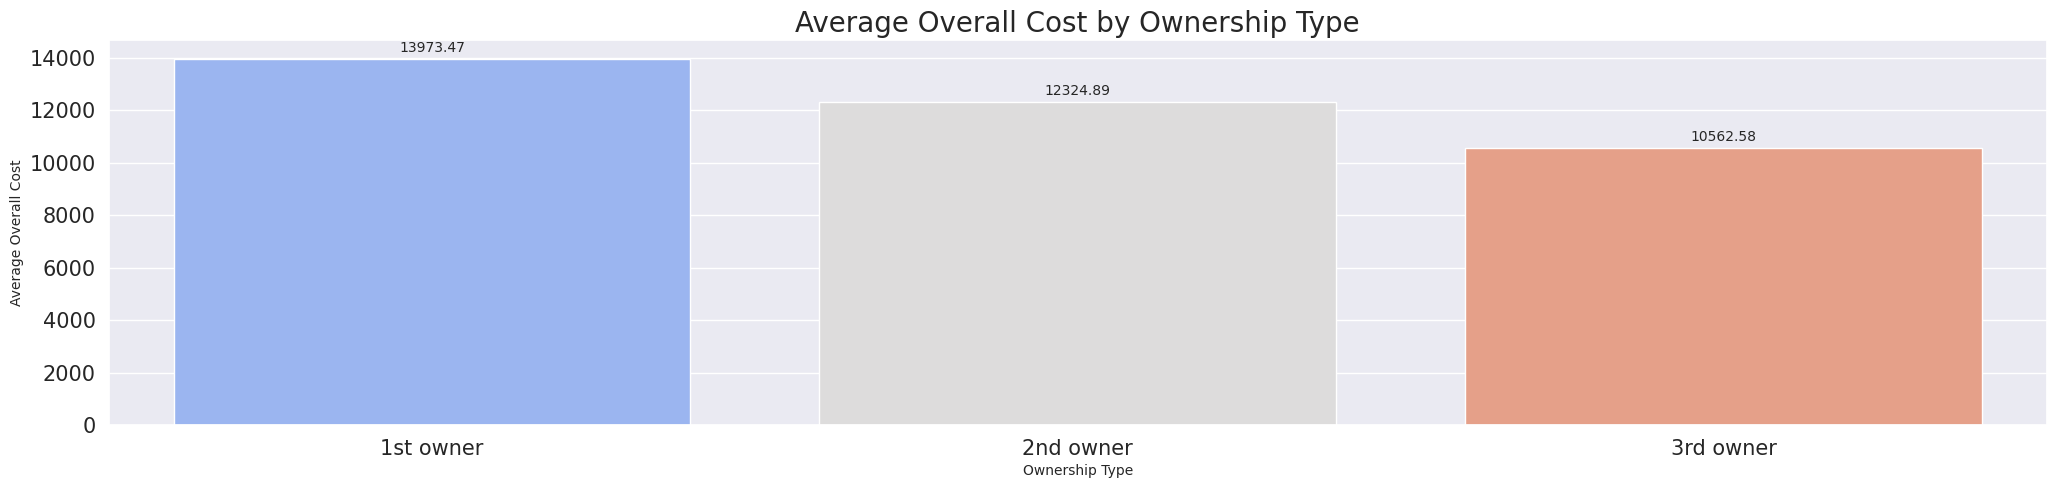

In [ ]:
sns.set(style="darkgrid")

average_overall_cost_by_ownership = cars.groupby('ownership')['overall_cost'].mean().reset_index()

fig, axes = plt.subplots(1, 1, sharey=True)

sns.barplot(data=average_overall_cost_by_ownership, x="ownership", y="overall_cost", palette="coolwarm", ax=axes)

for i, row in average_overall_cost_by_ownership.iterrows():
    axes.annotate(f"{row['overall_cost']:.2f}", (i, row['overall_cost']), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10)

plt.tick_params(labelsize=15)
plt.title("Average Overall Cost by Ownership Type", fontsize=20)
plt.xlabel("Ownership Type", fontsize=10)
plt.ylabel("Average Overall Cost", fontsize=10)

plt.show()

# **5. Feature Engineering**

Feature engineering is a key step in the machine learning process where raw data is converted into useful features that improve model performance. In this project, I dealt with missing values by replacing them with suitable replacements and converting categorical features into numerical values by encoding techniques like Label Encoding.

I also handled the ownership column by changing the categories into numbers. The features 'has_insurance' and 'spare_key' were converted to binary (1 or 0) so as to be suitable for the model. These transformations made the model understand the data in a better way and generate the correct predictions.

## **5.1 Converting ownership into simplified numerical category**

The ownership column was transformed into numeric values (1 for 1st owner, 2 for 2nd, etc.), making it easier for the model to interpret ownership status. This helped simplify multiple text-based categories into ordered numbers.


In [ ]:
cars['ownership'] = cars['ownership'].fillna("Other")
cars['ownership'] = cars['ownership'].replace({'1st owner': 1, '2nd owner': 2, '3rd owner': 3, '4th owner': 4, 'Other': 5})

## **5.2 Encoding Yes/No columns**

Binary columns like `has_insurance` and `spare_key` were encoded as 1 for 'Yes' and 0 for 'No' to make them machine-readable for modeling.


In [ ]:
cars['has_insurance'] = cars['has_insurance'].map({'Yes': 1, 'No': 0})
cars['spare_key'] = cars['spare_key'].map({'Yes': 1, 'No': 0})

## **5.3 Label Encoding for Categorical Variables**
Categorical columns such as brand, model, transmission, and fuel type were converted into numeric codes using Label Encoding to allow the model to process them effectively.


In [ ]:
categorical_cols = ['brand', 'model', 'transmission', 'fuel_type']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    cars[col] = le.fit_transform(cars[col])
    label_encoders[col] = le



['label_encoder.pkl']

## **5.4 Replacing NaN with 0**

Missing values were replaced with 0 or appropriate values to ensure the dataset remained clean and consistent for training the model.




In [ ]:
cars.fillna(0, inplace=True)

# **6. Model Training**
Once the data is cleaned, I have trained multiple machine learning algorithms to predict the prices of used cars. So the models to be used were Linear Regression, Decision Tree Regressor, Random Forest Regressor and XGBoost Regressor. Every model was trained using the training set and evaluated with both training and test data.

Performance metrics like R² Score, RMSE, MAE were also calculated for each model to check the accuracy of the model. Random Forest and XGBoost gave best results from all. Training process made me realize how good each model can capture the patterns from the data and make accurate predictions. Also, a dictionary was used to store the performance of each model neatly for later reference.

## **Train-Test Splitting**  
To evaluate the model's performance, I split the dataset into training and testing sets. This helps to train the model on one portion of the data and test its accuracy on unseen data, ensuring a fair and unbiased evaluation.

In [ ]:
X = cars.drop(columns=['price'])
y = cars['price']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Dictionary to store evaluation metrics
model_train_evaluation = {}
model_test_evaluation = {}

## **6.1 Linear Regression**
Linear Regression is one of the most basic algorithms used for predicting the continuous values. It performs this by discovering the best-fit straight line that relates the input variables (independent variables) with the output (dependent variable). This line is chosen such that the distance between the data points and the predicted points on the line is minimized.

This model is easy, understandable and works as a good base for many regression tasks. It is particularly useful when the data is trending linearly. But it will not work so well when the interaction between variables is more complicated, or even non-linear.


In [ ]:
linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Calculate performance metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = rmse_train = np.sqrt(mean_squared_error(y_test, y_test_pred))

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

train_result = {"Train R2": r2_train, "Train RMSE": rmse_train, "Train MAE":mae_train}
test_result = {"Test R2": r2_test, "Test RMSE": rmse_test, "Test MAE":mae_test}

model_train_evaluation["Linear Regression"] = train_result
model_test_evaluation["Linear Regression"] = test_result


In [ ]:
print(f"Linear Regression Training Results: {train_result}")
print(f"Linear Regression Testing Results: {test_result}")

Linear Regression Training Results: {'Train R2': 0.9631870828947875, 'Train RMSE': np.float64(59005.46546851233), 'Train MAE': 42479.33202602451}
Linear Regression Testing Results: {'Test R2': 0.9672640668452577, 'Test RMSE': np.float64(59005.46546851233), 'Test MAE': 41190.53276320195}


## **6.2 Random Forest**
Random Forest is a robust and popular ensemble learning algorithm which constructs many decision trees and fuse their predictions to improve prediction. Each tree is trained on a randomly chosen subset of the data and on a randomly chosen subset of features, which helps to prevent overfitting and to improve model accuracy.

It does this by taking the average of the predictions of all the individual trees (in regression tasks), giving a more stable and reliable results. Random Forest performs well with non-linear data and holds its performance even in case when there are a lot of features or missing values, that is why, it is suitable for complicated data sets, for example, used car price prediction.


In [ ]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate performance metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

train_result = {"Train R2": r2_train, "Train RMSE": rmse_train, "Train MAE": mae_train}
test_result = {"Test R2": r2_test, "Test RMSE": rmse_test, "Test MAE": mae_test}

model_train_evaluation["Random Forest"] = train_result
model_test_evaluation["Random Forest"] = test_result

In [ ]:
print(f"Random Forest Training Results: {train_result}")
print(f"Random Forest Testing Results: {test_result}")

Random Forest Training Results: {'Train R2': 0.9987789987084317, 'Train RMSE': np.float64(11614.777606556003), 'Train MAE': 3116.6027641551495}
Random Forest Testing Results: {'Test R2': 0.9960250505057375, 'Test RMSE': np.float64(20561.068762666535), 'Test MAE': 6992.406417112299}


## **6.3 Decision Tree**
Decision Tree Regressor is a simple yet efficient model that makes predictions by finding decision rules from the data features. It splits the data across branches from the most important feature at each step, and creates a tree-like structure, in which each leaf is a predicted value.

This model is simple to comprehend and understand, for it follows human decision making. However, it can also be prone to overfitting, especially when the tree gets too deep. Even so, it still manages to deliver decent performance for structured data and is a suitable baseline model for regression tasks like forecasting used car prices.

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)

dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate performance metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

train_result = {"Train R2": r2_train, "Train RMSE": rmse_train, "Train MAE": mae_train}
test_result = {"Test R2": r2_test, "Test RMSE": rmse_test, "Test MAE": mae_test}

model_train_evaluation["Decision Tree"] = train_result
model_test_evaluation["Decision Tree"] = test_result

In [ ]:
print(f"Decision Tree Training Results: {train_result}")
print(f"Decision Tree Testing Results: {test_result}")

Decision Tree Training Results: {'Train R2': 1.0, 'Train RMSE': np.float64(0.0), 'Train MAE': 0.0}
Decision Tree Testing Results: {'Test R2': 0.9934296603215923, 'Test RMSE': np.float64(26434.663679537658), 'Test MAE': 7351.158645276292}


## **6.4 XGBoost**

XGBoost(Xtreme Gradient Boosting) is a very good and highly efficient machine learning algorithm that is based on gradient boosting. It creates a collection of tiny decision trees and tries with each new tree to repair the mistakes that the preceding ones made. This sequence of methods is a technique for increasing accuracy and decreasing bias.

XGBoost is well known for his high performance as well as speed. It further contains regularization methods for preventing overfitting and automatically deals with missing values. Because of its strength and precision, it is commonly used in competitions and real world applications, such as predicting car prices with intricate relation between features.


In [ ]:
xgb_model = XGBRegressor(random_state=42, verbosity=0)

xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate performance metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

train_result = {"Train R2": r2_train, "Train RMSE": rmse_train, "Train MAE": mae_train}
test_result = {"Test R2": r2_test, "Test RMSE": rmse_test, "Test MAE": mae_test}

model_train_evaluation["XGBoost"] = train_result
model_test_evaluation["XGBoost"] = test_result

In [ ]:
print(f"XGBoost Training Results: {train_result}")
print(f"XGBoost Testing Results: {test_result}")

XGBoost Training Results: {'Train R2': 0.999953031539917, 'Train RMSE': np.float64(2278.231112069186), 'Train MAE': 1600.151611328125}
XGBoost Testing Results: {'Test R2': 0.9913842678070068, 'Test RMSE': np.float64(30270.935499254065), 'Test MAE': 8874.9130859375}


# **7. Model Evaluation**

Once I trained many machine learning models I calculated and compared their performance based on three key metrics: R² Score,  RMSE (Root Mean Squared Error), MAE (Mean Absolute Error). These metrics assist in finding out how well the model is doing with the car prices predictions.

R² Value indicates the amount of variation in the target variable that is predicted by the model. RMSE gives the average error in the same unit of the target (price), while MAE indicates the average absolute error. I ran the performance of all five algorithms: Linear Regression, Decision Tree, Random Forest, XGBoost, and SVR on both the training data and the test data.

For illustration purposes I made plots for R², RMSE, and MAE. This enabled us to clearly see, which model is best all around. The model with high R² and low RMSE and MAE was selected as the most accurate and reliable.

## **7.1 Model Evaluation DataFrame**
The evaluation dataframe was defined to hold the performance metrics of each model, namely R² score, RMSE and MAE, for the training as well as the testing datasets. This enabled to compare model performance at different evaluation metrics systematically. This made it much simpler to visualize and decipher the results and we are now able to identify the good and bad of each model. The dataframe was used as a measure of central storage for and access to model evaluation outcomes for further analysis and decision-making.

In [ ]:
train_results = {
    "Model": [],
    "Train R²": [],
    "Train RMSE": [],
    "Train MAE": []
}

test_results = {
    "Model": [],
    "Test R²": [],
    "Test RMSE": [],
    "Test MAE": []
}

for model_name in model_train_evaluation:
    train_results["Model"].append(model_name)
    train_results["Train R²"].append(model_train_evaluation[model_name]["Train R2"])
    train_results["Train RMSE"].append(model_train_evaluation[model_name]["Train RMSE"])
    train_results["Train MAE"].append(model_train_evaluation[model_name]["Train MAE"])

    test_results["Model"].append(model_name)
    test_results["Test R²"].append(model_test_evaluation[model_name]["Test R2"])
    test_results["Test RMSE"].append(model_test_evaluation[model_name]["Test RMSE"])
    test_results["Test MAE"].append(model_test_evaluation[model_name]["Test MAE"])

train_results_df = pd.DataFrame(train_results)
test_results_df = pd.DataFrame(test_results)

model_results_df = pd.merge(train_results_df, test_results_df, on="Model")

model_results_df

,Model,Train R²,Train RMSE,Train MAE,Test R²,Test RMSE,Test MAE
0,Linear Regression,0.963187,59005.465469,42479.332026,0.967264,59005.465469,41190.532763
1,Random Forest,0.998779,11614.777607,3116.602764,0.996025,20561.068763,6992.406417
2,Decision Tree,1.000000,0.000000,0.000000,0.993430,26434.663680,7351.158645
3,XGBoost,0.999953,2278.231112,1600.151611,0.991384,30270.935499,8874.913086


## **7.2 R² Score Comparison**

This graph shows the comparison of R² values of different models for both training and testing data. The R² score is the measure of how well the model fits the data, higher the value closer to 1, better the model fits. The graph helps us to determine how well the model works in the training data rather than on the unseen test data. The orange bars indicate R² score on the training set, and the blue bars represent R² score on test set.

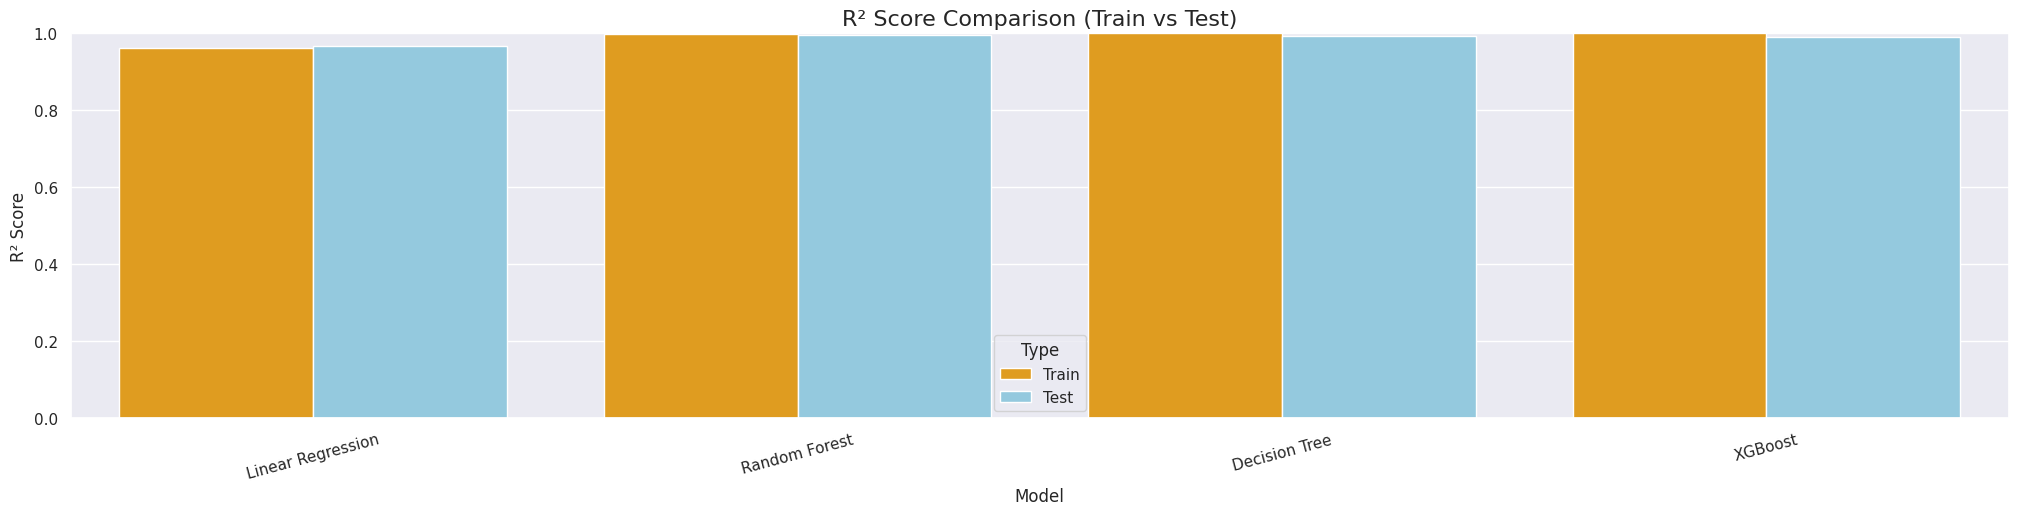

In [ ]:
r2_scores_combined = []

for model in model_train_evaluation:
    r2_scores_combined.append({"Model": model, "Type": "Train", "R² Score": model_train_evaluation[model]["Train R2"]})
    r2_scores_combined.append({"Model": model, "Type": "Test", "R² Score": model_test_evaluation[model]["Test R2"]})

r2_scores_df = pd.DataFrame(r2_scores_combined)

sns.set(style="darkgrid")

sns.barplot(x="Model", y="R² Score", hue="Type", data=r2_scores_df, palette=["orange", "skyblue"])

plt.title("R² Score Comparison (Train vs Test)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=15)
plt.ylim(0, 1)

plt.show()

## **7.3 RMSE Comparison**
This graph shows the Root Mean Squared Error (RMSE) of the models on both the training and testing sets. RMSE is a measure of the average prediction error of the actual value, with smaller values indicating better model. The orange bars are the RMSE calculated on the training set and the blue bars are the RMSE on the test set. Lower RMSE on test data suggests that the model is doing good at generalizing to unseen data.

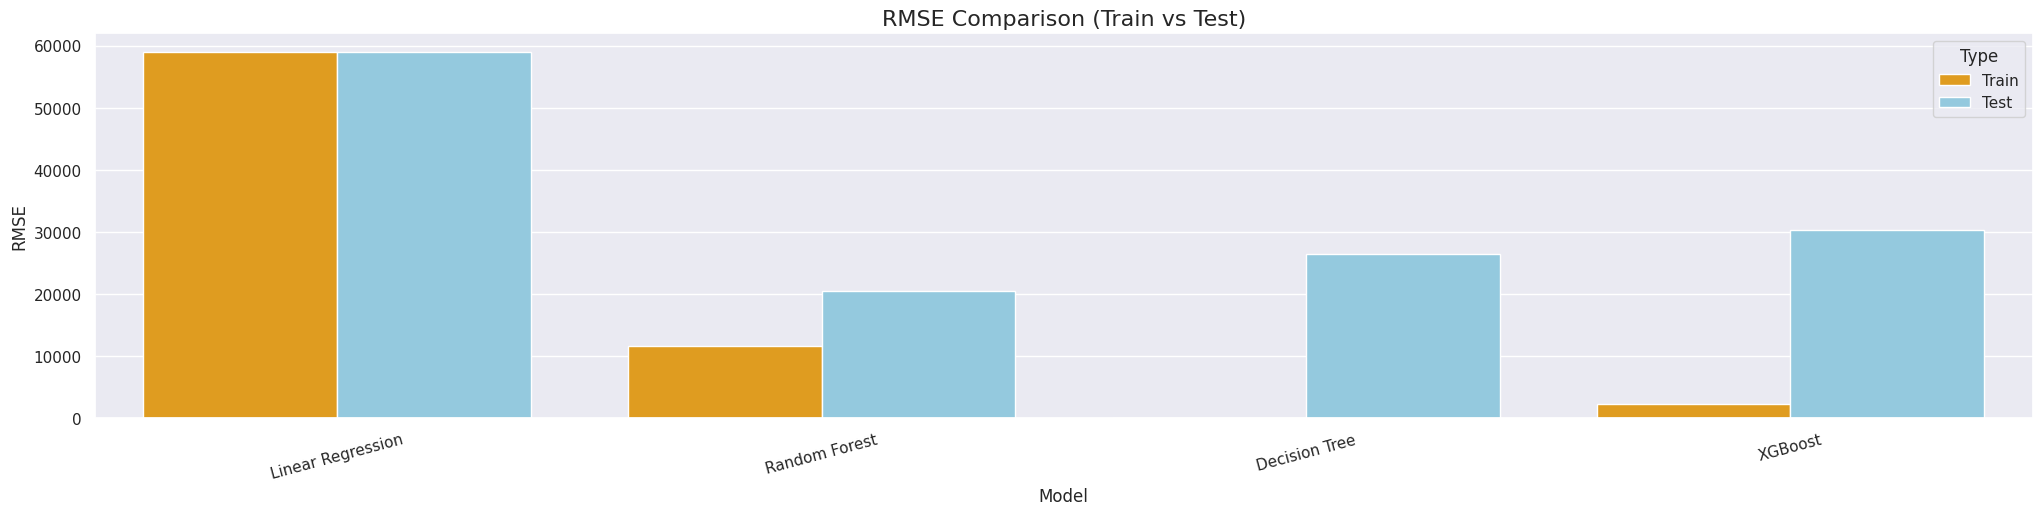

In [ ]:
rmse_scores_combined = []

for model in model_train_evaluation:
    rmse_scores_combined.append({"Model": model, "Type": "Train", "RMSE": model_train_evaluation[model]["Train RMSE"]})
    rmse_scores_combined.append({"Model": model, "Type": "Test", "RMSE": model_test_evaluation[model]["Test RMSE"]})

rmse_scores_df = pd.DataFrame(rmse_scores_combined)

sns.set(style="darkgrid")

sns.barplot(x="Model", y="RMSE", hue="Type", data=rmse_scores_df, palette=["orange", "skyblue"])

plt.title("RMSE Comparison (Train vs Test)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.xticks(rotation=15)

plt.show()

## **7.4 MAE Comparison**
This plot shows the Mean Absolute Error (MAE) of the models on the training set and testing set. MAE is the average magnitude of the errors in a set of predictions, with the lower the better. In this graph, orange bars represent MAE on training data, blue bars represent MAE on test data. The graph allows to evaluate how well each model predicts car prices on both the train and test datasets.

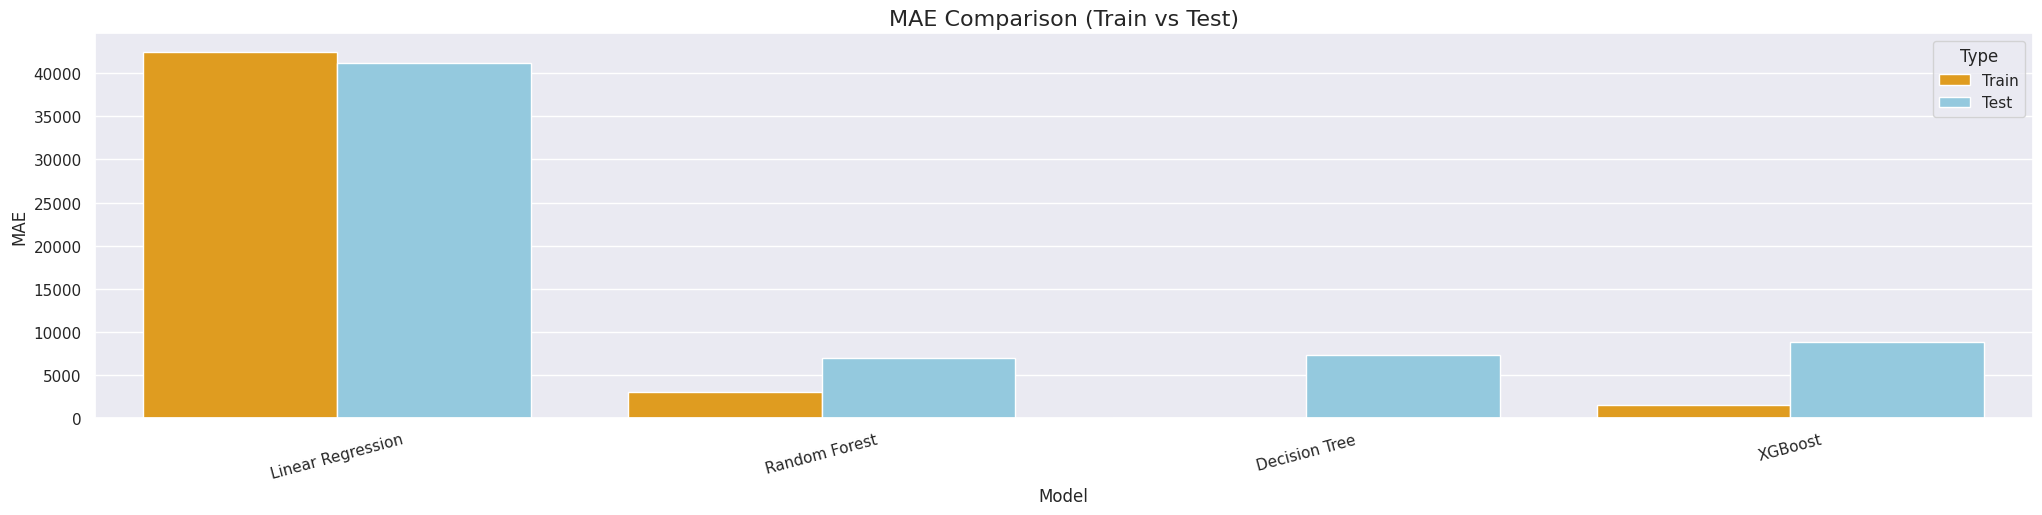

In [ ]:
mae_scores_combined = []

for model in model_train_evaluation:
    mae_scores_combined.append({"Model": model, "Type": "Train", "MAE": model_train_evaluation[model]["Train MAE"]})
    mae_scores_combined.append({"Model": model, "Type": "Test", "MAE": model_test_evaluation[model]["Test MAE"]})

mae_scores_df = pd.DataFrame(mae_scores_combined)

sns.set(style="darkgrid")

sns.barplot(x="Model", y="MAE", hue="Type", data=mae_scores_df, palette=["orange", "skyblue"])

plt.title("MAE Comparison (Train vs Test)", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("MAE", fontsize=12)
plt.xticks(rotation=15)

plt.show()


# **8. Exporting Model**

In this step, I exported the necessary components to be used later in the Streamlit app or for further analysis:

1. **Model Evaluation Results (CSV)**: Exported the dataframe containing the evaluation metrics (R², RMSE, and MAE) for all models to a CSV file for easy reference and visualization.


In [ ]:
# Export the model evaluation results dataframe to a CSV file
model_results_df.to_csv(folder_path + 'model_evaluation_results.csv', index=False)

2. **Random Forest Model (Pickle)**: Saved the trained Random Forest model using `joblib` to make predictions later in the app.


In [ ]:
# Save the Random Forest model to a file
joblib.dump(rf_model,folder_path +'random_forest_model.pkl')

['/content/drive/MyDrive/CarSales/random_forest_model.pkl']

3. **Preprocessed Data (CSV)**: Exported the preprocessed dataset to ensure consistency in predictions when loading the data in the app.


In [ ]:
# Saving Preprocessed data of cars
cars.to_csv(folder_path +'preprocessed_data.csv', index=False)

4. **Label Encoder (Pickle)**: Saved the `LabelEncoder` used for encoding categorical variables to make sure the model predictions are consistent when used in the app.

In [ ]:
# To save the Label Encoder
joblib.dump(label_encoders, folder_path + 'label_encoder.pkl')

['/content/drive/MyDrive/CarSales/label_encoder.pkl']

In [ ]:
example_input = X_test.iloc[[0]]

predicted_price = rf_model.predict(example_input)

print("Input Features:")
print(example_input)
print(f"Predicted Price for Example Car: ₹{int(predicted_price[0])}")

Input Features:
      brand  model  transmission  make_year  fuel_type  engine_capacity(CC)  \
1091      7     92             1       2016          3                998.0   

      km_driven  ownership  overall_cost  has_insurance  spare_key  \
1091    77365.0          1        7644.0            0.0          0   

      reg_year_only  
1091         2016.0  
Predicted Price for Example Car: ₹391060


In [ ]:
example_input = X_test.iloc[[10]]

predicted_price = rf_model.predict(example_input)

print("Input Features:")
print(example_input)
print(f"Predicted Price for Example Car: ₹{int(predicted_price[0])}")

Input Features:
      brand  model  transmission  make_year  fuel_type  engine_capacity(CC)  \
2323      7    472             0       2022          3                998.0   

      km_driven  ownership  overall_cost  has_insurance  spare_key  \
2323    28720.0          1       12442.0            0.0          1   

      reg_year_only  
2323         2022.0  
Predicted Price for Example Car: ₹636340
